#**Assignment 4 Part 1**

**Expected Time:** 5-6 hours

# **Submission Instructions**

Rename both parts as Roll Number_Part Number.ipnyb. For example, 22100137_1.ipynb. <br>
Place .ipynb files of both parts in a folder, zip it, and rename the folder as Roll Number_4. For example, 22100137_4 

#**Housing Price Prediction**

The following dataset has been scraped from https://dasl.datadescription.com/datafile/saratoga-houses/. It holds data about prices of homes in Saratoga NY along with facts about them. For your curiosity, an image of Saratoga has been attached as well! 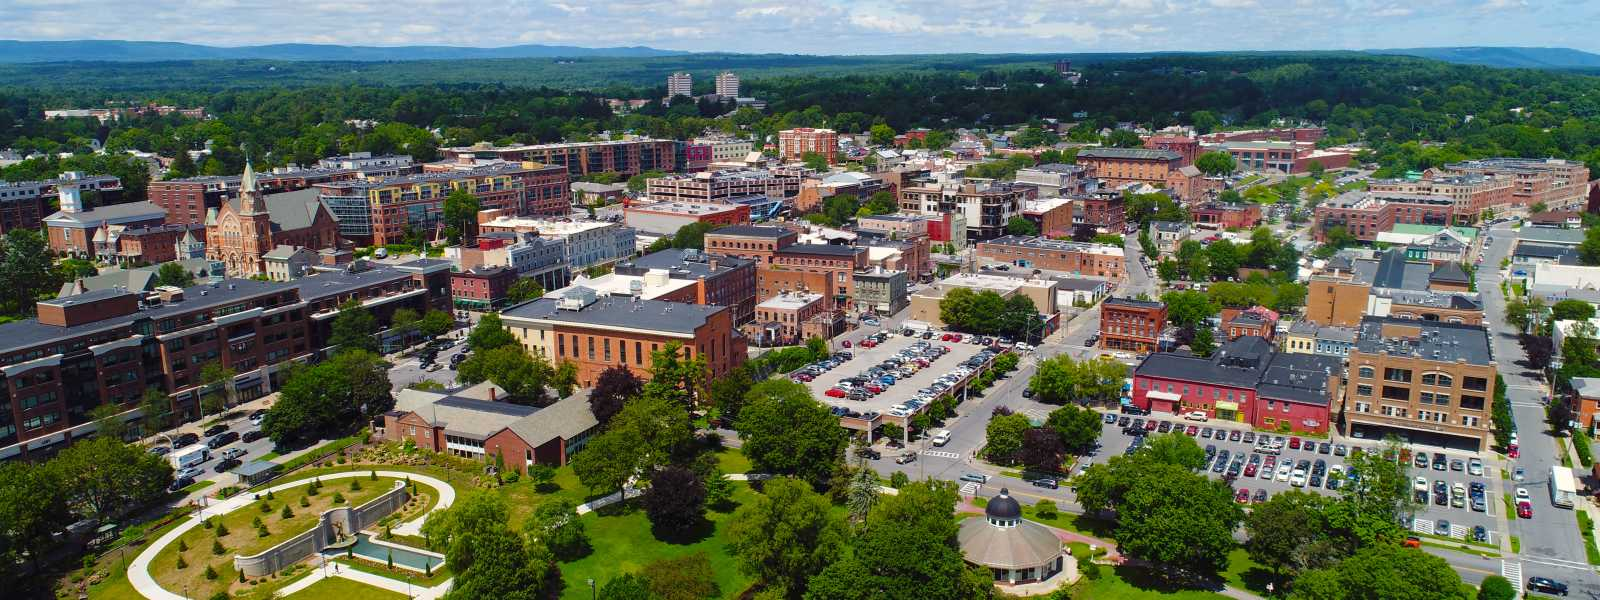 

The dataset contains several attributes that describe a household. Our goal is to apply a linear regression model in order to predict the price of a given house based on the model we train. <br>
**Note:** It is important for you to make sure every question works properly before you move on to the subsequent one. There are sample test provided in some cell. Though they are not exhaustive, they will give you an idea if your helper functions are working as planned or not. Best of luck!

###**Importing Libraries**

In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###**Inspecting the data**

In [366]:
# Run this cell as it is without any changes
# Note that the dataset is pre-cleaned
data = pd.read_csv("data.csv")
print("Shape:", data.shape)

Shape: (1728, 16)


In [367]:
data.head(5)

,Price,IotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,5000,0.29,4,35800,1700,63,3,1,2.5,6,hot air,gas,public/commercial,No,No,Yes
1,10300,0.16,20,15700,912,54,2,1,1.5,4,electric,electric,public/commercial,No,No,No
2,10300,0.16,20,15700,912,54,2,1,1.5,6,electric,electric,public/commercial,No,No,No
3,20000,0.52,59,8000,936,20,2,0,1.0,4,hot air,oil,septic,No,No,No
4,25000,0.21,75,900,920,44,2,0,1.0,6,hot air,oil,septic,No,No,No


In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1728 non-null   int64  
 1   IotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


###**Preparing Data**

You might have studied in class that a machine learning model needs numerical input to work upon. In our dataset, we have non-numeric input as well that needs to be mapped before we can use it. There are two types of mappings possible: Ordinal Encoding and One-hot Encoding. <br>
Go though the following article: <br>
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ <br>
and answer the question below: <br> <br>
**Q1:** What is Ordinal Encoding and One-hot Encoding. How are both different from each other? (/4)

Answer here

**Q2a:** We would like to map some of our variables using Ordinal encoding while others using one-hot encoding.<br> Follow the following mapping pattern: <br>
**Ordinal:** sewer, waterfront, newConstruction, centralAir <br> 
**One-hot:** heating, fuel <br>
For ordinal encoding, you can use any mapping (No:1, Yes:2...). Avoid using 0's over here. <br>
For One-hot encoding, use the get_dummies function. (/5)


In [369]:
# Enter code here
#one-hot
one_hot = pd.get_dummies(data[['heating','fuel']])
#one_hot_f = pd.get_dummies(data['fuel'])


#ordinal
data['sewer']= data['sewer'].map({'public/commercial': 1, 'septic': 2, 'none':2})
data['waterfront'] = data['waterfront'].map({'No': 1, 'Yes': 2})
data['newConstruction'] = data['newConstruction'].map({'No': 1, 'Yes': 2})
data['centralAir'] = data['centralAir'].map({'No': 1, 'Yes': 2})
# There will be two variables named 'electric' (after one-hot-encoding). Do not forget to rename one of them.

In [370]:
#data.value_counts(data["centralAir"])
one_hot


,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,fuel_gas,fuel_oil
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
1723,0,0,1,0,1,0
1724,0,1,0,0,1,0
1725,0,1,0,0,1,0
1726,0,1,0,0,1,0


**Q2b:** Once you are done with this, do not forget to drop 'heating' nad 'fuel' from the dataframe. (/2) <br>

In [371]:
# Enter code here
data.drop(columns=['heating','fuel'],axis=1, inplace = True)
#data.drop(columns=['fuel'], inplace = True)

**Q2b:** Finally, concatenate the two dataframes that you got as a result of one_hot encoding in Q2a with the original dataframe. (/4) 

In [372]:
# Enter code here
data= pd.concat([data, one_hot], axis=1)
#data= pd.concat([data, one_hot_f], axis=1)

After all these operations, there will be 20 columns in the dataframe. Run a quick check in the following cell. If there are any discrepancies, you are advised to check your working again.

In [373]:
print(data.shape)
data.head(5)

(1728, 20)


,Price,IotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,sewer,waterfront,newConstruction,centralAir,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,fuel_gas,fuel_oil
0,5000,0.29,4,35800,1700,63,3,1,2.5,6,1,1,1,2,0,1,0,0,1,0
1,10300,0.16,20,15700,912,54,2,1,1.5,4,1,1,1,1,1,0,0,1,0,0
2,10300,0.16,20,15700,912,54,2,1,1.5,6,1,1,1,1,1,0,0,1,0,0
3,20000,0.52,59,8000,936,20,2,0,1.0,4,2,1,1,1,0,1,0,0,0,1
4,25000,0.21,75,900,920,44,2,0,1.0,6,2,1,1,1,0,1,0,0,0,1


**Q3a:** Next, we want to see how significantly does each variable corelated with the 'Price' of the house. Show a correlation matrix of each attribute with the 'Price' variable only. (/3)

In [374]:
# Enter code here
corr_mat = data.corr()['Price'].sort_values()
#plt.subplots(figsize=(15,15))
#sns.heatmap(corr_mat, annot = True, linewidths=3, linecolor='black', cmap = 'Blues')
#plt.title('Correlation Plot')
#plt.xlabel('Features')
#plt.show()
corr_mat

heating_electric          -0.235583
fuel_electric             -0.225631
age                       -0.188793
fuel_oil                  -0.089226
sewer                     -0.069535
heating_hot water/steam   -0.013253
waterfront                 0.154062
IotSize                    0.158333
newConstruction            0.158506
heating_hot air            0.198691
pctCollege                 0.200119
fuel_gas                   0.252771
centralAir                 0.332550
fireplaces                 0.376786
bedrooms                   0.400349
rooms                      0.531170
landValue                  0.581266
bathrooms                  0.597250
livingArea                 0.712390
Price                      1.000000
Name: Price, dtype: float64

**Q3b:** What does the correlation matrix tell you? What arributes are highly correlated and what have a weak correlation? (/3) 

highly correlated:
landValue                 
bathrooms
livingArea

weak correlation:
heating_electric          
fuel_electric             
age 


**Q4.** Now, we want to split our features into input (X) and output (y) variables. Slice the original dataframe into two dataframes named X and y. Add all the attributes that you feel will improve the model in X. Add the target variable in y. Please follow these naming conventions. <br>
You can come back to this question in the end as well to see if changing the input variables has an effect on your model or not. (/4)

In [375]:
# Enter code here
X = data.drop('Price',axis=1)
y = data[['Price']]

**Q5:** Convert both the dataframes to numpy arrays and overwrite the same variables X and y. (/2)

In [376]:
# Enter Code here
X = np.array(X)
y = np.array(y)

**Q6:** Next, we want to convert our X and y arrays into train and test sets. Use the **fit_transform** function to standardize both arrays first. Then use the **train_test_split** function to create a 70:30 split (70% Train 30% Test). (/5) <br> Resources have been provided for your guidance. <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [377]:
# Enter Code here
# Store your results in four variables: X_train, X_test, y_train, y_test
# Enter code here
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Note: After this part, you should have four sets (arrays) of values with you: X_train, X_test, y_train, y_test

In [378]:
# X_train, X_test, y_train, y_test
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1209, 19) (1209, 1)
Test set: (519, 19) (519, 1)


So far, we have gathered all our data and converted it into suitable form. Now it is time to build a model!

###**Building a Model**

In this part, you will be implementing the model yourself (with the guide of placeholders). While this approach is seldom used, it is important to understand the basics of the mechanics behind these models for you to understand why a model might not be working as well as you would want it to.

**Note: Your solution has to be efficient**. Using simple for loops to iterate over all data-points will not earn you full marks, you should try to use vectorized versions of the equations. Make sure you deal with exploding weights or division by zeros. This can be done by changing the learning rates and using the right algorithms when calculating the derivatives. If you get an "overflow" error, try to **reduce the learning rate and double check your loss derivative** (though derivatives will be given to you in the form of placeholders but this is something that you should be aware of).

**Q7:** Complete the function below to calculate predicted obseration(s), given certain parameters of the model (theta) and X. (/2)

In [379]:
# Replace 'None' with your code
def predict(theta, X):
    #X_t = X.transpose()
    return np.dot(X,theta.reshape(-1,1))

**Q8:** Complete the functions below to be able to compute the squared loss and absolute loss. (/4)

In [380]:
# Replace 'None' with your code

def squared_loss(y, yhat):
    return (pow((y-yhat), 2))
    
def abs_loss(y, yhat):
    return (np.abs(y-yhat))

**Q9:** Complete the function below to compute mean squared loss and the absolute squared loss. (/5)

*Answering Guidelines:* The following are the parameters being sent in:
* X: the features of the data
* theta: model parameters
* y: the observed response variable
* loss_func: defines what function needs to be computed - 'L2' or 'L1'. This parameter has been kept for future purposes. 

Simply complete the statements. In the case where wrong input has been entered for ```loss_func```, make the function return 0.

In [381]:
def compute_cost(X, theta, y, loss_func):
    yhat = predict(theta, X)
    if loss_func == "L2": 
      cost=np.mean(squared_loss(y,yhat))
  
    elif loss_func == "L1":
      cost=np.mean(abs_loss(y,yhat))
    else:
        return None
    return cost

'''
For testing purposes
Run the complete cell after coding the above function. Do not modify the tests below. 
Note that these tests are not extensive. They will only spot obvious errors (if they exist) in the functions above. 
If these do not match the answers provided, you should take another look at the functions you created. 
'''
theta_test = np.array([1, 2, 3])
test_x = np.array([[4, 5, 6]])
test_y = np.array([10])

cost_test_L3 = compute_cost(test_x, theta_test, test_y, "L3")
# Running the above line should run the code in the 'else' region of the function
cost_test_L2 = compute_cost(test_x, theta_test, test_y, "L2")
print("cost_test_L2 :", cost_test_L2)
# Suitable answer for cost_test_L2 : 484.0
cost_test_L1 = compute_cost(test_x, theta_test, test_y, "L1")
print("cost_test_L1 :", cost_test_L1)
# Suitable answer for cost_test_L1 : 22.0

cost_test_L2 : 484.0
cost_test_L1 : 22.0


**Q10:** How would you reason the use of MSE vs. MAE?

*Answering Guidelines:* Briefly discuss the strenghts and weaknesses of the two. (/4) 

MSE is used to check how close estimates or forecasts are to actual values. It incorporates the variance of the estimator and its bias

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction
One big problem in using MAE loss is that its gradient is the same throughout, which means the gradient will be large even for small loss values.


**Q11:** In class, you have studied the maths behind minimizing the loss functions to get to the optimal parameters of the model. Gradient Descent is an algorithm that does precisely that - optimizes parameters in order to get to the local minimum of the cost function by continuously tweaking the parameters of the model (guided through learning rate). (/5)

The following two links will prove to be useful while implementing the equations below:
* https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/
* https://builtin.com/data-science/gradient-descent

Do not get overwhelmed by the mathematics and the types of it. The purpose is for you to understand what it largely does and complete the formula below. Most of it has been implemented for you - you just need to translate equations already covered in class.

*Answering Guidelines:* The following are the parameters being sent in:
* X: the features of the data
* theta: model parameters
* y: the observed response variable
* loss_func: defines what function needs to be computed - 'L2' or 'L1'. This parameter has been kept for future purposes. 
* alpha: learning rate
* iter_num: number of iterations that your model will run for
* steps: after how many steps you would want to save the cost (to plot the learning curve). You need not worry about this since this is just for visualization purposes. Simply leave it as 1.

In [382]:
def gradient_descent(X, y, theta, alpha, iter_num, loss_func, steps):
    history = [] #cost history
    m = len(X) #number of samples of the data 

    for iteration in range(iter_num):
        # calculate cost
        cost=compute_cost(X, theta, y, loss_func)
        # calculate predicted value
        yhat=predict(theta,X)
        # calculate gradient
        if loss_func == "L2": 
          gradient=(np.dot(X.T, 2*(yhat-y)))
        elif loss_func == "L1":
          #y=y.flatten()
          gradient=(np.dot(X.T, ((yhat-y) / np.abs(yhat-y))))
     
        # update step
        #theta=theta-(gradient*alpha)
        theta=theta.reshape(-1,1) - (gradient * (alpha/m))
        steps=steps+1
        # record cost history
        
        history.append(cost)
    return history, theta

#For testing purposes. Do not modify. 
theta_14 = np.array([1, 2, 3])
X_14 = np.array([[4, 5, 6], [4, 5, 6]])
y_14 = np.array([10, 11]).reshape(-1,1)
history, theta_opt = gradient_descent(X_14, y_14, theta_14, 0.01, 1, "L1", 1)
print(history, theta_opt)
# Expected value for history = 21.5
# Expected theta_opt is = [0.85 1.85 2.85]

[21.5] [[0.96]
 [1.95]
 [2.94]]


**Q12:** Next, add the bias terms to X_train and X_test. (/3)

In [383]:
# Enter Code here
X_train = np.concatenate([np.zeros((len(X_train),1)), X_train],axis=1)
X_test = np.concatenate([np.zeros((len(X_test),1)), X_test],axis=1)

###**Running the Model**

**Q13:** We are almost set to train our model. Now that the methods have been written, we will put it altogether and run a multiple linear regression model on our data. First, initialize a theta vector with all zeros in it. Set values of other variables and adjust them as necessary. (/3)

*Answering Guidelines:* The placeholders have been made. Simply call the appropriate functions and methods.

In [384]:
# Initialize the parameter to zero
theta = np.zeros((X_train.shape[1],))
#Initialize parameters
iter_num =200
alpha =0.01
loss_func = "L2"
steps = 1 # Do not change this

cost_history, theta = gradient_descent(X_train, y_train, theta, alpha, iter_num, loss_func, steps)

The figure has been coded for you. Run the next cell to see how your cost varies with iterations.

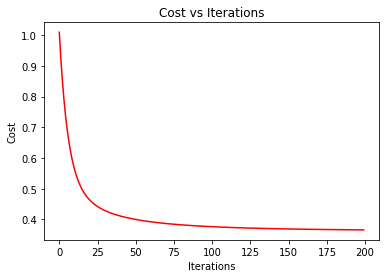

In [385]:
fig, ax = plt.subplots()
ax.plot(np.arange(iter_num), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Iterations')
plt.show()

**Q14:** Run predictions on y_train and y_test. We will be using these in the next questions. Simply call the predict function made before (/2)


In [386]:
yhat_test =predict(theta,X_test)
yhat_train =predict(theta,X_train)

**Q15:** Calculate residuals for the above predictions. (/3)

Answering Guidelines: To read up on why residuals are needed, the following article is a good read as well: https://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis

In [387]:
train_residuals =(y_train-yhat_train)
test_residuals =(y_test-yhat_test)

#print(train_residuals)
#print(test_residuals)

**Q16:** Plot the residual plots for, both, the train and test data. Clearly label all axis and attach a title. (/5)

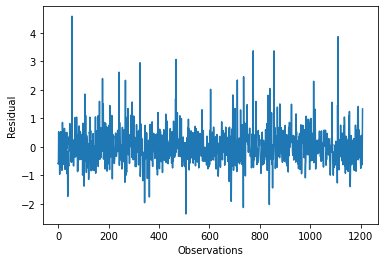

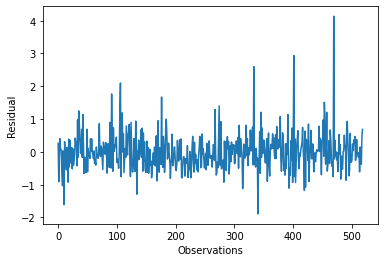

In [392]:
# Enter Code here  
plt.plot(train_residuals)
plt.xlabel('Observations')
plt.ylabel('Residual')
plt.show()
plt.plot(test_residuals)
plt.xlabel('Observations')
plt.ylabel('Residual')
plt.show() 

**Q17:** Make use of histograms to see the distribution of the residuals. Clearly label all axis and attach a title. (/3)

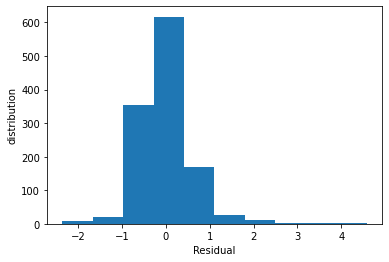

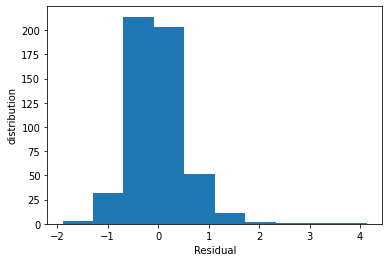

In [395]:
# Enter Code here
plt.hist(train_residuals)
plt.xlabel('Residual')
plt.ylabel('distribution')
plt.show()
plt.hist(test_residuals)
plt.xlabel('Residual')
plt.ylabel('distribution')
plt.show()

**Q18:** What are the above residual plots telling you? What conclusion about your predicted results can you make from these? (/3)

Answer here

## **Bonus Questions**

Attempting this part of the assignment is optional and will be graded as a bonus.

**Total Marks: 15**

**B1:** Compute the values of R^2. (/3)<br> This link might help you for the task: <br> https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=R2%3D1%E2%88%92sum%20squared,from%20the%20mean%20all%20squared. 

In [390]:
# Replace None with your code
def r2(yhat, y):
  return None
    
r2_val = r2(yhat_test, y_test)
r2_val

**B2:** What does the value tell you? Can you assess whether the model is a good-fit from this value? Why or why not? (/3)

Answer here

**B3:** Compute RMSE. (/3)

In [391]:
# Replace None with your code
def rmse(y, yhat):
  return (np.sqrt((np.sum(np.square(y-yhat)))/len(y)))

rmse_test = rmse(y_test, yhat_test)
rmse_train = rmse(y_train, yhat_train)

print(rmse_test)
print(rmse_train)

0.561020208326347
0.6049742117724126


**B4:** What are the above values telling you? Can you assess whether the model is a good-fit from this value? Why or why not? (/3)

Answer here

**B5:** In conclusion, what can you comment about the performance of your model? Suggest ways in which you can improve it. /3)

Answer here

This brings an end to our modelling part. Remember that is is an iterative process in which you have to repeat your working several times to adjust parameters, select the best combination of features, analyze results, and think of improvements. We hope that this assignment has given you a good idea of implementing the various stages in a machine learning model.<br> <br> 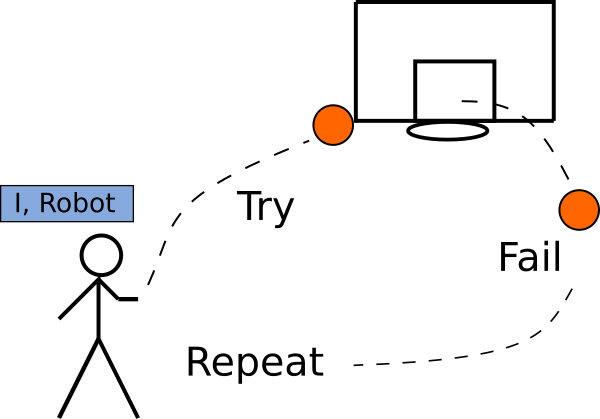 